In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Assignment 10: Ordinary Differential Equations

#Abstract 
Many differential equations coming from different fields of science are very difficult to solve analytically, and some(especially non-linear ones) don't have closed-form solutions at all. A range of numerical methods aimed to solve differential equations was developed. This assignment investigates 4 such methods: explicit and implicit Euler, midpoint, and Runge-Kutta of order 4. The most important thing here is to choose the method that optimises both accuracy and computational cost. Since RK4 has the highest order, it resulted in the smallest errors for a given stepsize.

#Introduction

We are provided with a system of 2 stiff ODEs:

$$\frac{dy_1}{dx}=999y_1+1999y_2=f_1(y_1,y_2)$$
$$\frac{dy_2}{dx}=-1000y_1-2000y_2=f_2(y_1,y_2)$$

And initial conditions $y_1(0)=y_2(0)=1$. We try to solve this problem numerically on the interval $[0,0.2]$ using 4 methods:

*   Explicit Euler, O(h)
*   Midpoint, O(h^2)
*   Runge Kutta of order 4, O(h^4)
*   Implicit Euler, O(h)

where $h$ is the stepsize

In order to calculate error, we solve the problem analytically and then find the error for a particular stepsize using root-mean-square formula. Then we plot the behavior of error vs stepsize to see if it is in line with theoretical schemes. 


In [2]:
#analytical solution of system of ODEs:
def y1(x):
  return 3998/999*np.exp(-x)-2999/999*np.exp(-1000*x)

def y2(x):
  return -2000/999*np.exp(-x)+2999/999*np.exp(-1000*x)
  
#derivatives required for numerical solutions:
def f1(y1,y2):
  return 999*y1+1999*y2

def f2(y1,y2):
  return -1000*y1-2000*y2


#Methodology

##Explicit Euler
We use the following iterative scheme for this method

$$y_1[i]=y_1[i-1]+f_1(y_1[i-1],y_2[i-1])*h$$

$$y_2[i]=y_2[i-1]+f_2(y_1[i-1],y_2[i-1])*h$$



In [3]:
def euler_exp(f1,f2,y1_0,y2_0,x_0,x_n,h):
  n=int((x_n-x_0)/h)
  x=np.linspace(x_0,x_n,n)
  y1=np.zeros(n)
  y2=np.zeros(n)
  y1[0]=y1_0
  y2[0]=y2_0
  for i in range(1,n):
    y1[i]=y1[i-1]+f1(y1[i-1],y2[i-1])*h
    y2[i]=y2[i-1]+f2(y1[i-1],y2[i-1])*h
  return x,y1,y2

##Midpoint

We use the following iterative scheme for this method

$$y_1[i+1/2]=y_1[i]+f_1(y_1[i],y_2[i])*h/2$$

$$y_2[i+1/2]=y_2[i]+f_2(y_1[i],y_2[i])*h/2$$

$$y_1[i+1]=y_1[i]+f_1(y_1[i+1/2],y_2[i+1/2])*h$$

$$y_2[i+1]=y_2[i]+f_2(y_1[i+1/2],y_2[i+1/2])*h$$




In [4]:
def midpoint(f1,f2,y1_0,y2_0,x_0,x_n,h):
  n=int((x_n-x_0)/h)
  x=np.linspace(x_0,x_n,n)
  y1=np.zeros(n)
  y2=np.zeros(n)
  y1[0]=y1_0
  y2[0]=y2_0
  for i in range(1,n):
    y1_half=y1[i-1]+f1(y1[i-1],y2[i-1])*h/2
    y2_half=y2[i-1]+f2(y1[i-1],y2[i-1])*h/2
    y1[i]=y1[i-1]+f1(y1_half,y2_half)*h
    y2[i]=y2[i-1]+f2(y1_half,y2_half)*h
  return x,y1,y2

##Runge-Kutta(order 4)

We use the following iterative scheme:

$$k_{11}=f_1(y_1[i-1],y_2[i-1])$$
$$k_{12}=f_2(y_1[i-1],y_2[i-1])$$
$$k_{21}=f_1(y_1[i-1]+h/2*k_{11},y_2[i-1]+h/2*k_{12})$$
$$k_{22}=f_2(y_1[i-1]+h/2*k_{11},y_2[i-1]+h/2*k_{12})$$
$$k_{31}=f_1(y_1[i-1]+h/2*k_{21},y_2[i-1]+h/2*k_{22})$$
$$k_{32}=f_2(y_1[i-1]+h/2*k_{21},y_2[i-1]+h/2*k_{22})$$
$$k_{41}=f_1(y_1[i-1]+h*k_{31},y_2[i-1]+h*k_{32})$$
$$k_{42}=f_2(y_1[i-1]+h*k_{31},y_2[i-1]+h*k_{32})$$
$$y_1[i]=y_1[i-1]+h/6*(k_{11}+2*k_{21}+2*k_{31}+k_{41})$$
$$y_2[i]=y_2[i-1]+h/6*(k_{12}+2*k_{22}+2*k_{32}+k_{42})$$

In [5]:
def rk4(f1,f2,y1_0,y2_0,x_0,x_n,h):
  n=int((x_n-x_0)/h)
  x=np.linspace(x_0,x_n,n)
  y1=np.zeros(n)
  y2=np.zeros(n)
  y1[0]=y1_0
  y2[0]=y2_0
  for i in range(1,n):
    k11=f1(y1[i-1],y2[i-1])
    k12=f2(y1[i-1],y2[i-1])
    k21=f1(y1[i-1]+h/2*k11,y2[i-1]+h/2*k12)
    k22=f2(y1[i-1]+h/2*k11,y2[i-1]+h/2*k12)
    k31=f1(y1[i-1]+h/2*k21,y2[i-1]+h/2*k22)
    k32=f2(y1[i-1]+h/2*k21,y2[i-1]+h/2*k22)
    k41=f1(y1[i-1]+h*k31,y2[i-1]+h*k32)
    k42=f2(y1[i-1]+h*k31,y2[i-1]+h*k32)
    y1[i]=y1[i-1]+h/6*(k11+2*k21+2*k31+k41)
    y2[i]=y2[i-1]+h/6*(k12+2*k22+2*k32+k42)
  return x,y1,y2

##Implicit Euler

We need to solve the follwing system:
$$y_1[i]=y_1[i-1]+f_1(y_1[i],y_2[i])*h=y_1[i-1]+h*(999y_1+1999y_2)$$

$$y_2[i]=y_2[i-1]+f_2(y_1[i],y_2[i])*h=y_2[i-1]+h*(-1000y_1-2000y_2)$$

This system has two unknowns and the solutions are following:

$$y_2[i]=\frac{y_2[i-1]-\frac{1000*h*y_1[i-1]}{1-999*h}}
{1+2000*h+\frac{1999000*h^2}{1-999*h}}$$

$$y_1[i]=\frac{y_1[i-1]+1999*h*y_2[i]}{1-999*h}$$

In [6]:
def euler_imp(f1,f2,y1_0,y2_0,x_0,x_n,h):
  n=int((x_n-x_0)/h)
  x=np.linspace(x_0,x_n,n)
  y1=np.zeros(n)
  y2=np.zeros(n)
  y1[0]=y1_0
  y2[0]=y2_0
  for i in range(1,n):
    y2[i]=(y2[i-1]-(1000*h*y1[i-1])/(1-999*h))*1/(1+2000*h+1999000*h**2/(1-999*h))
    y1[i]=(y1[i-1]+1999*h*y2[i])/(1-999*h)
  return x,y1,y2

##Calculating global error

The error is calculated using rms formula: 

$$rms=\sqrt{\frac{\sum_i e_i^2}{n}}$$

Where $e_i$ is a difference between analytical value and numerical one

In [7]:
def error(f1,f2,y1_0,y2_0,x_0,x_n,h,method):
  k=len(h)
  e1=np.zeros(k)
  e2=np.zeros(k)
  for i in range(k):
    htemp=h[i]
    x,y1_theor,y2_theor=method(f1,f2,y1_0,y2_0,x_0,x_n,htemp)
    y1_real=y1(x)
    y2_real=y2(x)
    n=len(x)
    et1=0
    et2=0
    for j in range(n):
      et1=et1+(y1_real[j]-y1_theor[j])**2
      et2=et2+(y2_real[j]-y2_theor[j])**2
    et1=np.sqrt(et1/n)
    et2=np.sqrt(et2/n)
    e1[i]=et1
    e2[i]=et2
  return e1,e2

#Results

Analytical solution looks like this:

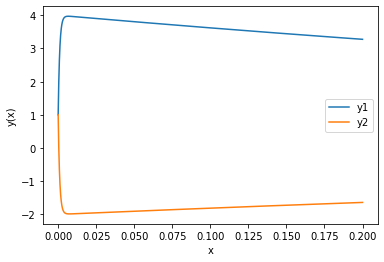

In [10]:
x=np.linspace(0,0.2,1000)
plt.plot(x,y1(x),label='y1')
plt.plot(x,y2(x),label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.show()

##Explicit Euler

We can see below that when $h>0.002$, solutions are unstable. For $0.002>h>0.001$ solutions are stable but not very accurate, since they have an oscillatory component. For solutions $h<0.001$ they are stable and accurate. 

h=0.003


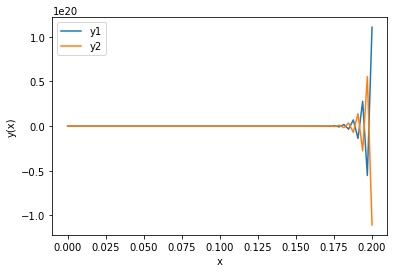

In [15]:
x,y1_eeuler,y2_eeuler=euler_exp(f1,f2,1,1,0,0.2,0.003)
plt.plot(x,y1_eeuler,label='y1')
plt.plot(x,y2_eeuler,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.003')
plt.legend()
plt.show()

h=0.0021


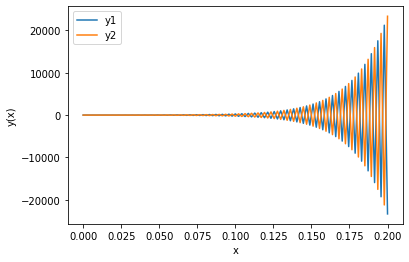

In [17]:
x,y1_eeuler,y2_eeuler=euler_exp(f1,f2,1,1,0,0.2,0.0021)
plt.plot(x,y1_eeuler,label='y1')
plt.plot(x,y2_eeuler,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.0021')
plt.legend()
plt.show()

h=0.002


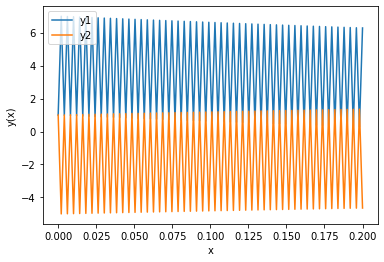

In [19]:
x,y1_eeuler,y2_eeuler=euler_exp(f1,f2,1,1,0,0.2,0.002)
plt.plot(x,y1_eeuler,label='y1')
plt.plot(x,y2_eeuler,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.002')
plt.legend()
plt.show()

h=0.0019


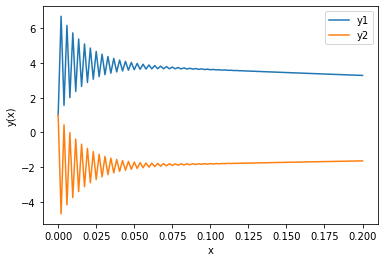

In [20]:
x,y1_eeuler,y2_eeuler=euler_exp(f1,f2,1,1,0,0.2,0.0019)
plt.plot(x,y1_eeuler,label='y1')
plt.plot(x,y2_eeuler,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.0019')
plt.legend()
plt.show()

h=0.0011


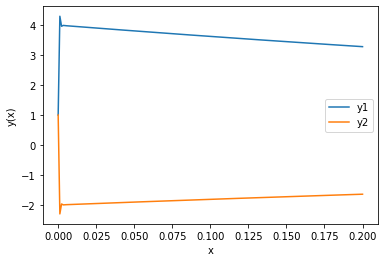

In [44]:
x,y1_eeuler,y2_eeuler=euler_exp(f1,f2,1,1,0,0.2,0.0011)
plt.plot(x,y1_eeuler,label='y1')
plt.plot(x,y2_eeuler,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.0011')
plt.legend()
plt.show()

h=0.001


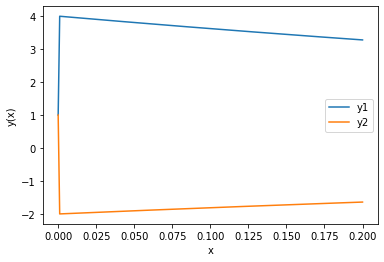

In [21]:
x,y1_eeuler,y2_eeuler=euler_exp(f1,f2,1,1,0,0.2,0.001)
plt.plot(x,y1_eeuler,label='y1')
plt.plot(x,y2_eeuler,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.001')
plt.legend()
plt.show()

h=0.0005


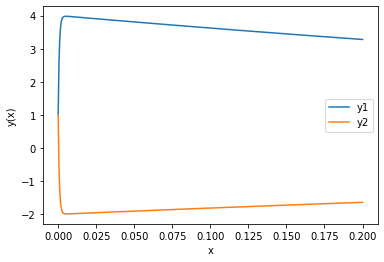

In [22]:
x,y1_eeuler,y2_eeuler=euler_exp(f1,f2,1,1,0,0.2,0.0005)
plt.plot(x,y1_eeuler,label='y1')
plt.plot(x,y2_eeuler,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.0005')
plt.legend()
plt.show()

##Midpoint

Similarly to previous method, we can see below that when  $h>0.002$ , solutions are unstable. Solutions for smaller step-sizes are stable and get more accurate when stepsize decreases.


h=0.003


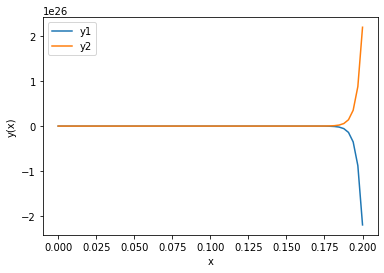

In [23]:
x,y1_mid,y2_mid=midpoint(f1,f2,1,1,0,0.2,0.003)
plt.plot(x,y1_mid,label='y1')
plt.plot(x,y2_mid,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.003')
plt.legend()
plt.show()

h=0.0021


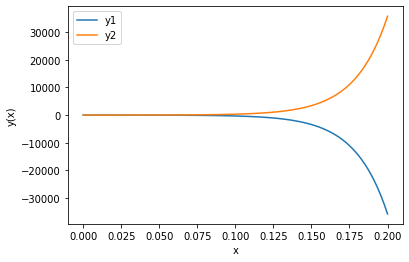

In [24]:
x,y1_mid,y2_mid=midpoint(f1,f2,1,1,0,0.2,0.0021)
plt.plot(x,y1_mid,label='y1')
plt.plot(x,y2_mid,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.0021')
plt.legend()
plt.show()

h=0.002


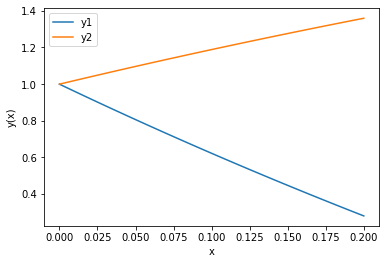

In [25]:
x,y1_mid,y2_mid=midpoint(f1,f2,1,1,0,0.2,0.002)
plt.plot(x,y1_mid,label='y1')
plt.plot(x,y2_mid,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.002')
plt.legend()
plt.show()

h=0.0019


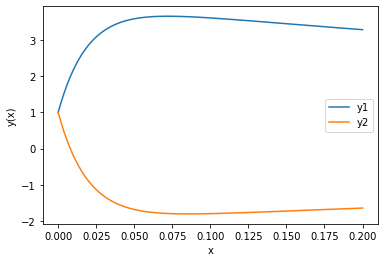

In [26]:
x,y1_mid,y2_mid=midpoint(f1,f2,1,1,0,0.2,0.0019)
plt.plot(x,y1_mid,label='y1')
plt.plot(x,y2_mid,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.0019')
plt.legend()
plt.show()

h=0.0015


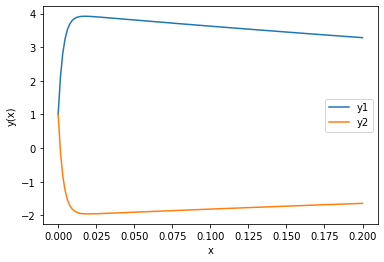

In [48]:
x,y1_mid,y2_mid=midpoint(f1,f2,1,1,0,0.2,0.0015)
plt.plot(x,y1_mid,label='y1')
plt.plot(x,y2_mid,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.0015')
plt.legend()
plt.show()

h=0.001


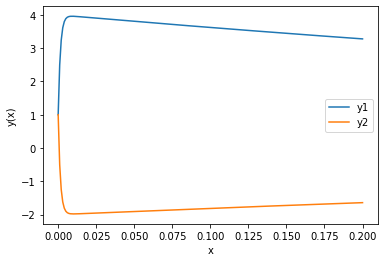

In [27]:
x,y1_mid,y2_mid=midpoint(f1,f2,1,1,0,0.2,0.001)
plt.plot(x,y1_mid,label='y1')
plt.plot(x,y2_mid,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.001')
plt.legend()
plt.show()

h=0.0005


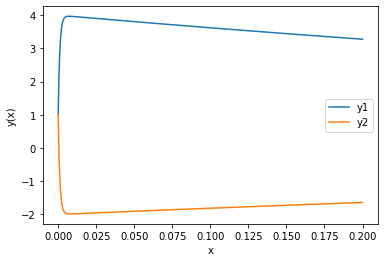

In [28]:
x,y1_mid,y2_mid=midpoint(f1,f2,1,1,0,0.2,0.0005)
plt.plot(x,y1_mid,label='y1')
plt.plot(x,y2_mid,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.0005')
plt.legend()
plt.show()

##Runge-Kutta(order 4)
For Runge-Kutta $h>0.0027$ are unstable. And for smaller $h$ solutions get more accurate

h=0.0028


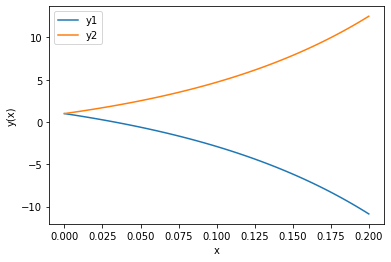

In [40]:
x,y1_rk,y2_rk=rk4(f1,f2,1,1,0,0.2,0.0028)
plt.plot(x,y1_rk,label='y1')
plt.plot(x,y2_rk,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.0028')
plt.legend()
plt.show()

h=0.0027


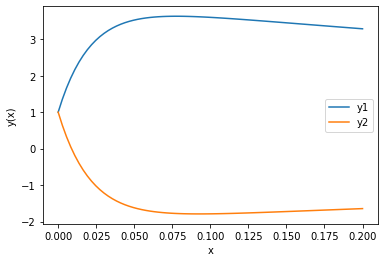

In [39]:
x,y1_rk,y2_rk=rk4(f1,f2,1,1,0,0.2,0.0027)
plt.plot(x,y1_rk,label='y1')
plt.plot(x,y2_rk,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.0027')
plt.legend()
plt.show()

h=0.002


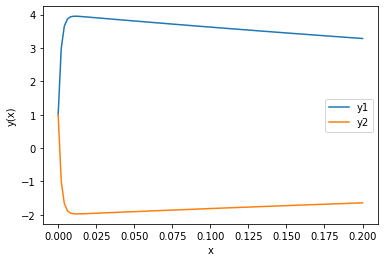

In [41]:
x,y1_rk,y2_rk=rk4(f1,f2,1,1,0,0.2,0.002)
plt.plot(x,y1_rk,label='y1')
plt.plot(x,y2_rk,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.002')
plt.legend()
plt.show()

h=0.001


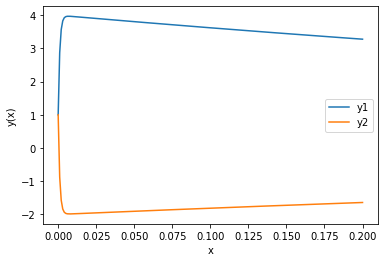

In [43]:
x,y1_rk,y2_rk=rk4(f1,f2,1,1,0,0.2,0.001)
plt.plot(x,y1_rk,label='y1')
plt.plot(x,y2_rk,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.001')
plt.legend()
plt.show()

##Implicit Euler

As expected from the lecture, this method is uncondotionally stable.

h=0.05


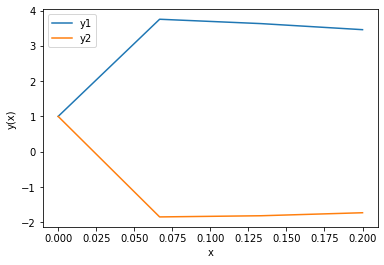

In [52]:
x,y1_ieuler,y2_ieuler=euler_imp(f1,f2,1,1,0,0.2,0.05)
plt.plot(x,y1_ieuler,label='y1')
plt.plot(x,y2_ieuler,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.05')
plt.legend()
plt.show()

h=0.005


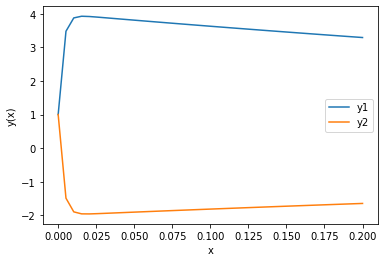

In [51]:
x,y1_ieuler,y2_ieuler=euler_imp(f1,f2,1,1,0,0.2,0.005)
plt.plot(x,y1_ieuler,label='y1')
plt.plot(x,y2_ieuler,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.005')
plt.legend()
plt.show()

h=0.002


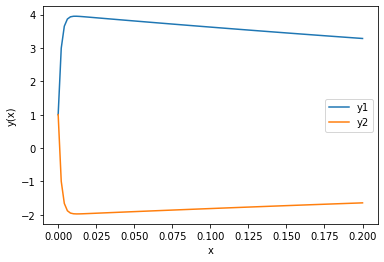

In [53]:
x,y1_ieuler,y2_ieuler=euler_imp(f1,f2,1,1,0,0.2,0.002)
plt.plot(x,y1_ieuler,label='y1')
plt.plot(x,y2_ieuler,label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
print('h=0.002')
plt.legend()
plt.show()

##Global error

Error of explicit and implicit Euler methods increases linearly with the stepsize. Midterm method error increases quadratically and RK4 erro is proportional to the fourth power. All the methods behave according to theoretical preditictions. 

In [57]:
h=np.linspace(0.00001,0.002,1000)
e1_eeuler,e2_eeuler=error(f1,f2,1,1,0,0.2,h,euler_exp)
e1_mid,e2_mid=error(f1,f2,1,1,0,0.2,h,midpoint)
e1_rk,e2_rk=error(f1,f2,1,1,0,0.2,h,rk4)
e1_ieuler,e2_ieuler=error(f1,f2,1,1,0,0.2,h,euler_imp)

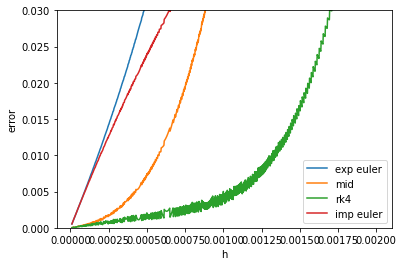

In [63]:
plt.plot(h,e1_eeuler,label='exp euler')
plt.plot(h,e1_mid,label='mid')
plt.plot(h,e1_rk,label='rk4')
plt.plot(h,e1_ieuler,label='imp euler')
plt.xlabel('h')
plt.ylabel('error')
plt.ylim(0,0.03)
plt.legend()
plt.show()

#Conclusion

Implicit Euler method is stable for all stepsizes. Explicit Euler and Midpoint are stable for $h$$<$$0.002$. RK4 method is stable roughly at $h$$<$$0.0027$. Euler methods are first order, Midpoint is second order and RK4 is fourth order. The behavior of errors was consistent with the order of the method

#References
* Lectures by Prof. Abdikamalov:
https://www.youtube.com/watch?v=ev_g_6DKAHM
https://www.youtube.com/watch?v=VfZlcCjTTj4
https://www.youtube.com/watch?v=ZL97OhSi6UM
* Chapra, S. C., & Canale, R. P. (2011). Numerical methods for engineers